#     ИССЛЕДОВАНИЕ ДЛЯ ИНТЕРНЕТ - МАГАЗИНА 

Нам известны из открытых источников  исторические данные (до 2016г. включительно) о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Чтобы выполнить поставленную перед нами задачу, будем работать по следующему плану:

1) выполним предобработку данных;

2) проверим сколько игр выпускалось в разные годы;

3) проверим как менялись продажи по платформам;

4) установим факторы, которые влияют на продажи;

5) посмотрим как менялись продажи по жанрам. Выделим самые прибыльные жанры и жанры с низкими продажами;

6) составим портрет пользователя каждого региона;

7) сформулируем выводы;

Приступим.

# Изучение общей информации 

Познакомимся с данными из файла:

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/games.csv')
#df.head(15)
#df.tail(15)
df.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14851,Rugby Challenge 3,PS3,2016.0,Sports,0.00,0.02,0.00,0.00,NaN,tbd,NaN
15984,Sora no Otoshimono Forte: Dreamy Season,DS,2011.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
12262,Jam Sessions 2,DS,2009.0,Misc,0.06,0.00,0.00,0.00,66.0,tbd,E10+
8550,Flushed Away,GC,2006.0,Platform,0.12,0.03,0.00,0.00,47.0,tbd,E
15429,Rinne no Lagrange: Kamogawa Days,PS3,2012.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
5755,My Horse & Me,Wii,2007.0,Sports,0.27,0.02,0.00,0.02,NaN,NaN,NaN
8983,MLB SlugFest 20-03,GC,2002.0,Sports,0.11,0.03,0.00,0.00,80.0,7.5,E
6762,Avatar: The Last Airbender - Into the Inferno,PS2,2008.0,Adventure,0.12,0.09,0.00,0.03,NaN,NaN,NaN
9137,Eternal Poison,PS2,2008.0,Role-Playing,0.07,0.05,0.00,0.02,65.0,8.2,T
15376,Back to the Future: The Game,X360,2015.0,Adventure,0.02,0.00,0.00,0.00,NaN,7.5,NaN


In [2]:
# Выведем на экран общую информацию о файле:
df.info()
# отдельно выведем названия столбцов:
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Описание данных:

-	Name — название игры
-	Platform — платформа
-	Year_of_Release — год выпуска
-	Genre — жанр игры
-	NA_sales — продажи в Северной Америке (миллионы долларов)
-	EU_sales — продажи в Европе (миллионы долларов)
-	JP_sales — продажи в Японии (миллионы долларов)
-	Other_sales — продажи в других странах (миллионы долларов)
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Перед нами таблица, состоящая из 16715 строк и 11 столбцов. Из которых 4 содержат категориальную переменную('Name', 'Platform', 'Genre', 'Rating'), остальные 7 - количественную. В 6 столбцах имеются пропуски в ячейках. Названия столбцов нужно привести к нижнему регистру для удобства работы с ними. 

Итак, прежде чем переходить к расчетам, нужна предобработка данных.

### Вывод:

Одна строка в таблице содержит информацию об одной игре, а именно: название игры, год выпуска, жанр, название платформы. А также: оценку критиков, пользователей и рейтинг от организации ESRB. Также: сумму продаж в млн. долларов США в странах Северной Америки, в Европе, в Японии и других странах.

# Предобработка данных

В таблице выполним следующие преобразования:

1) Внесем изменения в названия столбцов: приведем к нижнему регистру.

2) Заполним в нужных столбцах пропуски.

3) В столбце User_Score - оценка пользователей (максимум 10) содержится строковое значение 'tbd' рассмотрим это значение и преобразуем

4) Сделаем замену типа данных

5) Удалим дубликаты строк в таблице



1) Преобразуем названия столбцов:

In [3]:
# Воспользуемся методом columns в сочетании с str.lower() - приводит к нижнему регистру
df.columns = df.columns.str.lower()
df.columns # Проверим результат

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Преобразования в названиях столбцов выполнены. Это облегчит работу со столбцами.

2) Проверим в каких столбцах есть пропуски и в каком количестве:

In [4]:
# Обратимся к методу isnull() в связке с sum():
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце 'name' и 'genre' по 2 пропущенных значения. Выведем строки на экран:

In [5]:
# Сделаем срез данных, содержащего пустые значения в столбце 'name'
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что пропуски в 'name', 'genre', 'critic_score', 'user_score', 'rating'. Восстановить данные не сможем, поэтому удалим их из таблицы:

In [6]:
# Вызовем метод dropna()/ автоматически удалятся пропуски и в столбце 'genre'
df.dropna(subset = ['name'], inplace = True)

Готово. 

Перейдем к столбцу 'rating'.  Т.к. одна игра может быть выпущена на нескольких платформах, то возможно что у одной игры на одной платформе может быть пропущено значение, а на другой заполнено. Поэтому заменим часть пропусков заполненными значениями из другой платформы этой игры. То что не получится заменить - оставим пустой ячейкой.

In [7]:
# Сделаем сортировку по возрастанию по столбцу 'name' затем по 'rating'
#(Чтобы пустое значение оказалось в конце группы по 'name')
df.sort_values(by = ['name', 'rating'])
# Создадим столбец 'new_rating' копированием столбца'rating':
df['new_rating'] = df['rating']
# Делаем срез в столбце 'new_rating' - оставляем строки с пустыми значениями
# и делаем им, где возможно, присвоение первого значения столбца 'rating' из группы  'name'
df.loc[df['new_rating'].isnull(), 'new_rating'] = df.groupby('name')['rating'].transform('first')
# Пропуски, которые остались не заполнены - заменяем на пустое значение
df['new_rating'] = df['new_rating'].fillna(value = '')
df.info() # Проверим замену

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
new_rating         16713 non-null object
dtypes: float64(6), object(6)
memory usage: 2.3+ MB


Столбец 'rating' удалим. Он нам больше не понадобится: 

In [8]:
# Вызовем метод drop():
df = df.drop('rating', axis = 1)

Далее: проверим какой % пропусков в столбце 'year_of_release' - год выпуска:

In [9]:
# найдем отношение строк с пропусками ко всем строкам:
percent = (df['year_of_release'].isnull().sum()) / len(df)
percent

0.016095255190570215

Получилось ~ 2% - это относительно немного. Удалим пропуски в столбце:

In [10]:
# Вызовем метод dropna()
df.dropna(subset = ['year_of_release'], inplace = True)
# Проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
new_rating         16444 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Ячейки с пропущенными значениями из столбца 'year_of_release' удалены. 

В столбцах 'critic_score' - оценка критиков (максимум 100)  и 'user_score' - оценка пользователей (максимум 10) пропущенные значения оставим не заполненными. Скорее всего игры были не оценены ни критиками, ни пользователями.


3) Pассмотрим строковое значение 'tbd' в столбце user_score - оценка пользователей (максимум 10).

Статус "tbd" - аббревиатура значения "To Be Determined" (перевод с англ. "быть определенным"), предполагается, что у игры еще нет ни одного отзыва от пользователей.  Поэтому данное значение заменим на пустое значение и сразу выполним замену типа данных со строкового на числовой. Чтобы затем возможно было проводить математические операции.



In [11]:
# Применим метод to_numeric со значением errors = 'coerce' / некорректные значения будут переведены в NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')
# Выполним округление до целого:
df['user_score'] = round(df['user_score'])
# Проверим результат:
df['user_score'].sample(10)

11055    NaN
12518    8.0
1529     8.0
7773     3.0
1398     NaN
3932     NaN
5459     8.0
12403    NaN
16188    8.0
6746     6.0
Name: user_score, dtype: float64

В результате нужные преобразования в столбце 'user_score' выполнены корректно. Тип данных в этом столбце (и 'critic_score' - оценка критиков) оставим float64 - вещественные числа, т.к. на целочисленный перевести не получится из - за пропусков.

Заменим тип данных в столбце 'year_of_release' на целочисленный, а в 'critic_score' - на вещественный.

In [12]:
# Для замены типа данных в столбце используем метод astype():
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = pd.to_numeric(df['critic_score'])
# Проверим результат:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
new_rating         16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


4) Проверим таблицу на наличие дубликатов строк:

In [13]:
# Посчитаем количество с помощью duplicated() в сочетании с sum():
df.duplicated().sum()

0

Дублирующихся строк в талице нет. 

Добавим новый столбец 'sale_amount' - общая сумма продаж игры (в млн.долларов США):

In [14]:
# Выполним сложение соответствующих значений 'na_sales' + 'eu_sales' + 'jp_sales' + 'other_sales' для одной игры:
df['sales_amount'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,new_rating,sales_amount
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,31.38


Значения в столбцах, содержащих продажи в млн.долларов: 'na_sales' , 'eu_sales', 'jp_sales', 'other_sales' и 'sales_amount' оставим в виде вещественного числа для лучшего восприятия больших цифр.

# Исследовательский анализ

Посмотрим, сколько игр выпускалось в разные годы. Составим сводную таблицу game_year и построим график для наглядности:

In [15]:
# Создаем сводную таблицу с помощью метода pivot_table()
game_year = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
game_year.head(5) # Выведем первые пять строк

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


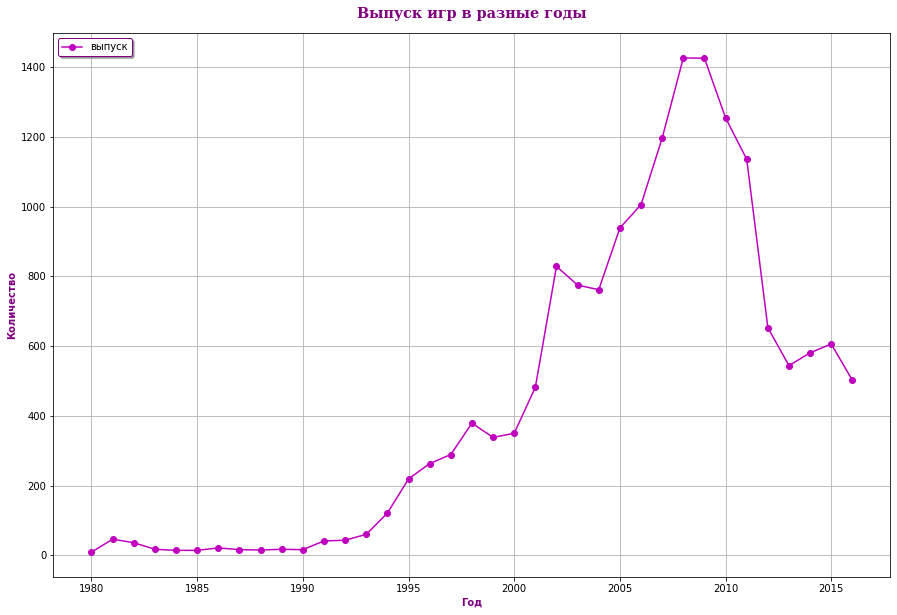

In [16]:
# Построим график:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.plot(game_year['name'], 'mo-', label = 'выпуск')
plt.title('Выпуск игр в разные годы', 
          family = 'serif', 
          pad = 15, 
          color = 'purple', 
          size = 'x-large', 
          fontweight = 'black')
plt.xlabel('Год', color = 'purple', fontweight = 'black')
plt.ylabel('Количество', color = 'purple', fontweight = 'black')
plt.legend(loc = 2, edgecolor = 'purple', shadow = True)
plt.grid()


На графике видно, что с 2000 года резко увеличивается выпуск компьютерных игр, а с 2009 резко - уменьшается до 2013г., затем снова повышение. Интересно с чем это связано. Почитаем историческую справку: ["развитие игровых приставок"](https://ru.wikipedia.org/wiki/Игровая_приставка)

Из прочитанной статьи заключаем: рынок игровых приставок(платформ) стремительными темпами развивается. Выделяют три крупных производителя: японские компании Sony и Nintendo и американскую Microsoft. Производители каждые несколько лет выпускают новые игровые платформы, заменяя устаревшие. Это связано с развитием технологий, появлением интернета, смартфонов, плантшетов и т.д.  Принято делить по развитию игровые системы на поколения. Сейчас 8 поколение игровых систем, начало которого относят к марту 2011г.

Также ясно, что разработка и выпуск компьютерных игр тесно связан с созданием игровых платформ: как только платформа появилась - игры только начинают разрабатываться под нее. Соответственно с каждым годом игр становится больше. Как только платформа устаревает - прекращают создавать под нее игры. 

Выясним "жизненный цикл" игровой платформы: 

1) посмотрим как менялись продажи по платформам с 2000 г.(т.к. в этом году резко увеличивается выпуск игр)

2) выделим лидеров по продажам

3) и на основании их установим: сколько лет приблизительно существовали платформы. 

Приступим.

Посмотрим как менялись продажи по платформам с 2000 по 2016г.:

In [17]:
# Создадим таблицу platform_sale: оставим в ней строки о продажах начиная с 2000г. по сегодняшний день:
platform_sale = df.query('year_of_release >= 2000').groupby('platform').agg({'sales_amount': 'sum'})
# Отсортируем данные в таблице platform_sale по убыванию и выведем результат:
platform_sale.sort_values(by = 'sales_amount', ascending = False)

,sales_amount
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.88
PSP,289.53
3DS,257.81


Самые прибыльные платформы: PS2, X360, PS3, Wii, DS. Их прибыль больше 500 млн.долларов. Построим график:

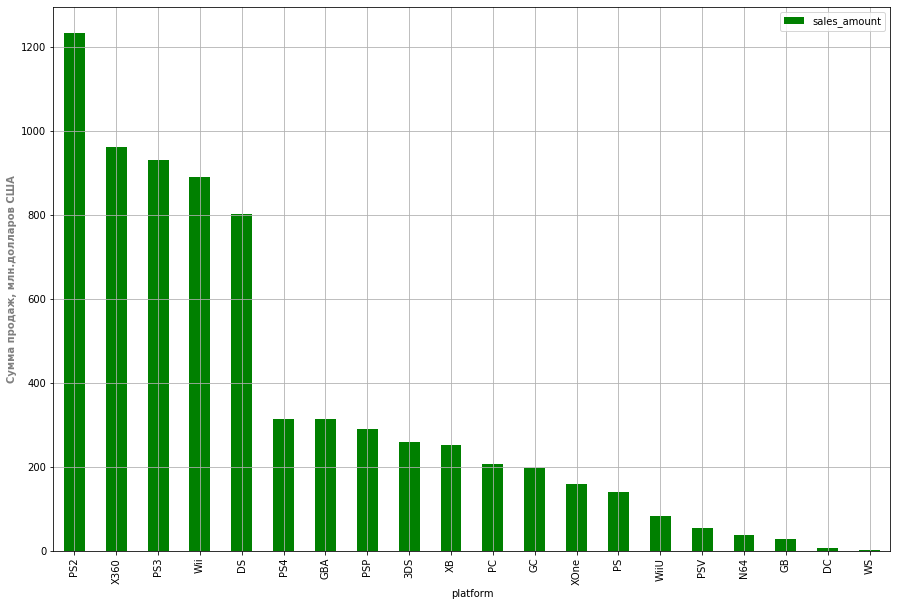

In [18]:
platform_sale.sort_values(by = 'sales_amount', ascending = False).plot(kind = 'bar', figsize = (15,10), color = 'green')
plt.grid()
plt.ylabel('Сумма продаж, млн.долларов США', color = 'grey', fontweight = 'black')
plt.show()


На полученном графике хорошо видно разницу между прибылью . Построим распределение по годам для пяти самых успешных платформ: PS2, X360, PS3, Wii, DS

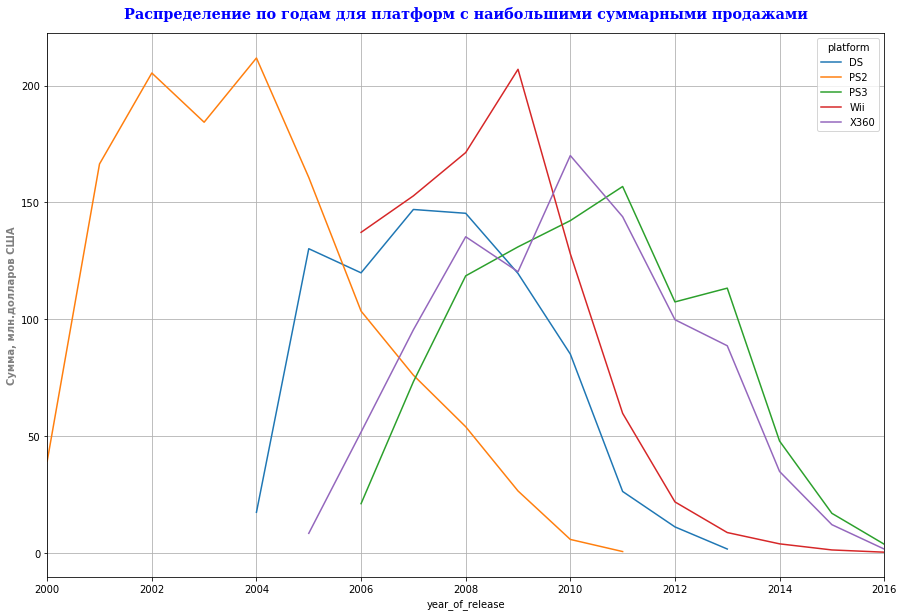

In [19]:
# Создадим словарь, содержащий список самых прибыльных платформ:
list_a = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
# Отфильтруем таблицу: продажи с 2000г. и продажи для платформ из словаря:
graf = df.query('platform == @list_a and year_of_release >= 2000')
# Создадим сводную таблицу и построим график:
graf_table = graf.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales_amount',
                             aggfunc = 'sum').plot(figsize = (15,10))
plt.title('Распределение по годам для платформ с наибольшими суммарными продажами', family = 'serif', pad = 15, 
          color = 'blue', size = 'x-large', fontweight = 'black' )
plt.ylabel('Сумма, млн.долларов США', color = 'grey', fontweight = 'black')
plt.grid()
plt.show()

На графике видно, что после появления платформы первые ~ 4-5 лет наблюдается увеличение продаж, а после ~ 4-5 лет уменьшение продаж, которые в конечном итоге после истечения ~ 10 лет исчезают. Вычислим сколько лет ~ совершались продажи для лидеров. Результат выведем в виде таблицы:

In [20]:
graf_year = graf.groupby('platform').agg({'year_of_release': ['min', 'max'], 'sales_amount': ['sum']})
graf_year.columns = ['min', 'max', 'sum_sale_amount'] # переименуем столбцы
# Вычислим года существования платформы результат сохраним в новый столбец 'year':
graf_year['year'] = graf_year['max'] - graf_year['min']
graf_year.sort_values(by = 'min') # Отсортируем таблицу


,min,max,sum_sale_amount,year
platform,,,,
PS2,2000,2011,1233.56,11
DS,2004,2013,802.76,9
X360,2005,2016,961.24,11
PS3,2006,2016,931.34,10
Wii,2006,2016,891.18,10


Из данных таблицы становится ясно, что жизненный цикл для платформы в среднем ~ 10 - 11 лет. После уменьшения продаж (~4-5 лет от создания) и в связи развитием информационных технологии производители начинают разрабатывать новую платформу.

Для того  чтобы ответить на главный вопрос нам не потребуются все года из выборки, т.к. многие платформы устарели. Будем брать период с 2011  по 2016г. (с начала 8 поколения игровых систем).

Выведем на экран таблицу с продажами за период 2011-2016гг. с разбивкой по платформам: 

In [21]:
# Создадим сводную таблицу rezult_year:
rezult_year = df.query('year_of_release >= 2011').pivot_table(index = 'year_of_release', 
                                                                            columns = 'platform', 
                                                                            values = 'sales_amount',
                                                               aggfunc = 'sum', margins = True)
rezult_year = rezult_year.fillna(value = '0')# Заменим пустые значения на 0
rezult_year

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,All
year_of_release,,,,,,,,,,,,,
2011,63.20,26.18,35.03,0.45,156.78,0,17.82,4.63,59.65,0,143.84,0,507.58
2012,51.36,11.01,23.22,0,107.36,0,7.69,16.19,21.71,17.56,99.74,0,355.84
2013,56.57,1.54,12.38,0,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96,361.24
2014,43.76,0,13.28,0,47.76,100,0.24,11.90,3.75,22.03,34.74,54.07,331.53
2015,27.78,0,8.52,0,16.82,118.9,0.12,6.25,1.14,16.35,11.96,60.14,267.98
2016,15.14,0,5.25,0,3.60,69.25,0,4.25,0.18,4.6,1.52,26.15,129.94
All,257.81,38.73,97.68,0.45,445.57,314.14,29.01,53.81,95.02,82.19,380.38,159.32,1954.11


Из полученных результатов видно, что многие платформы устарели (для смены созданы производителями новые) и продажи по ним прекратились: DS, PS2, PSP.

Построим график для наглядности:

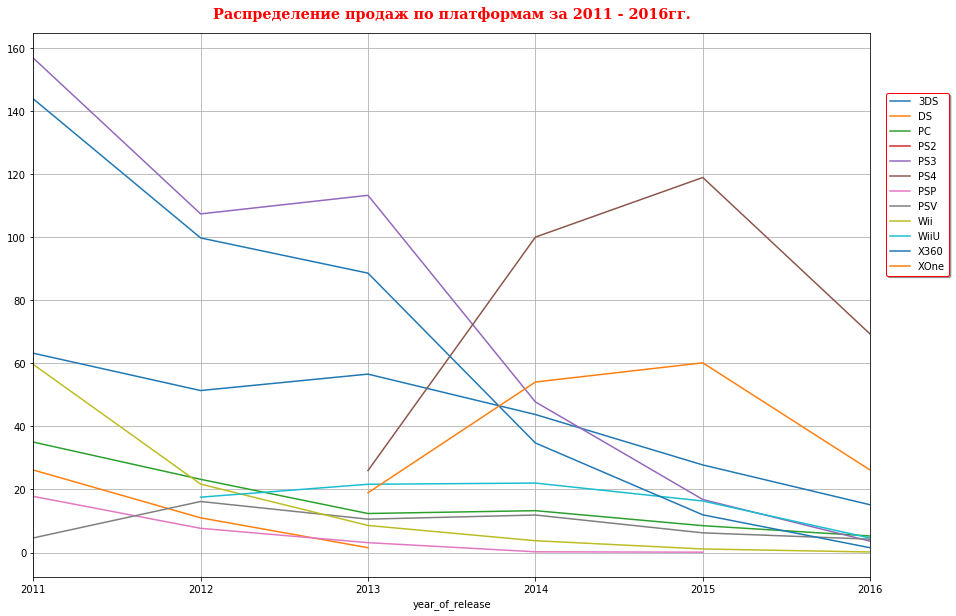

In [22]:
# Отфильтруем таблицу по году, создадим сводную таблицу, построим график:
df.query('year_of_release >= 2011').pivot_table(index = 'year_of_release', 
                                                                            columns = 'platform', 
                                                                            values = 'sales_amount',
                                                               aggfunc = 'sum').plot(figsize = (15,10))
plt.title('Распределение продаж по платформам за 2011 - 2016гг.', family = 'serif', pad = 15, 
          color = 'red', size = 'x-large', fontweight = 'black')
plt.grid()
plt.legend(bbox_to_anchor=(1.1, 0.9), edgecolor = 'red', shadow = True)
plt.show()


На графике хорошо видно, что заканчиваются продажи по платформам 6 поколения: DS, PSP, PS2. Продолжаются и постепенно уменьшаются из года в год продажи платформ 7 поколения: Wii, PS3, X360. Появились платформы 8 поколения: 3DS, PS4, XOne, PSV, WiiU.


**Перспективные платформы на 2017г.: PS4, XOne, 3DS, WiiU, PSV, PC.**	



*Сейчас построим график "ящик  с усами " по  продажам компьютерных игр с разбивкой по платформам:*

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


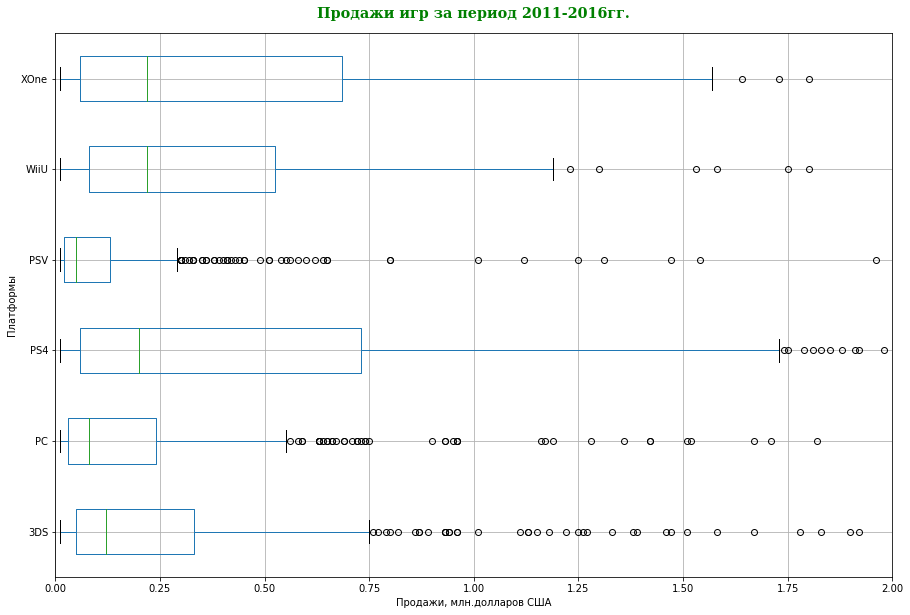

In [23]:
# Создадим словарь с названиями перспективных платформ:
platform_perspective = ['PS4', 'XOne', '3DS', 'WiiU', 'PSV', 'PC']
# Отфильтруем таблицу по году(оставим продажи с 2011) и по платформам (оставим нужные), далее создадим срез
graf = df.query('year_of_release >= 2011 and platform == @platform_perspective').copy()
# Создадим сводную таблицу и построим график
graf.pivot_table(index = 'name', 
                 columns = 'platform', 
                 values = 'sales_amount', 
                 aggfunc = 'sum').boxplot(vert = False, 
                                          figsize = (15,10))
plt.xlim(0, 2)
plt.title('Продажи игр за период 2011-2016гг.', family = 'serif', pad = 15, 
          color = 'green', size = 'x-large', fontweight = 'black')
plt.xlabel('Продажи, млн.долларов США')
plt.ylabel('Платформы')
plt.show()

Выведем на экран описательную статистику по полученным распределениям:

In [24]:
# Зададим формат для отображения вещественных чисел:
pd.options.display.float_format = '{:.2f}'.format
# Выведем таблицу на экран:
graf.pivot_table(index = 'platform', values = 'sales_amount', 
                 aggfunc = ['sum', 'mean', 'median', 'std', 'max', 'min'], margins = True)

,sum,mean,median,std,max,min
,sales_amount,sales_amount,sales_amount,sales_amount,sales_amount,sales_amount
platform,,,,,,
3DS,257.81,0.50,0.12,1.44,14.60,0.01
PC,97.68,0.25,0.08,0.51,5.14,0.01
PS4,314.14,0.80,0.20,1.61,14.63,0.01
PSV,53.81,0.13,0.05,0.21,1.96,0.01
WiiU,82.19,0.56,0.22,1.06,7.09,0.01
XOne,159.32,0.65,0.22,1.04,7.39,0.01
All,964.95,0.46,0.11,1.14,14.63,0.01


**Вывод:** 

**Распределения имеют положительную ассиметрию: виден сильный перекос вправо и длинный хвост экстремально высоких значений. Что, в свою очередь, указывает на наличие выбросов**

**Применительно к нашей задаче: лидируют по продажам игры на платформах PS4 и XOne.** 

**Описание продаж по платформе PS4: 90% продаж лежат в интервале от 0.01 и 1.7млн.долларов США. Медианные продажи ~ 0.2млн.долларов**

**Описание продаж по платформе XOne: 90% продаж лежат в интервале от 0.01 и 1.6млн.долларов США. Медианные продажи ~ 0.22млн.долларов**

**Т.к. распределения имеют сильный перекос вправо и правый ус графика достигает высоких значений: 1.7 и 1.6. Это указывает на то, что продажи по данным платформам сильно превышают медианные продажи. Данные платформы самые перспективные по продажам на 2017г.**

**Можно выделить еще платформу WiiU: 90% продаж лежат в интервале от 0.01 до ~ 1.15 - 1.2млн.долларов США. Медианные продажи ~ 0.22.**

**Общие продажи по платформе 3DS ~257.81млн.долларов (больше всех остальных), но медианные продажи ~0.12 и правый ус достигает значения ~0.75. Это значит, что 90% продаж лежат в интервале от 0.12 до 0.75. Выше 0.75 лежат выбросы. Скорее всего есть несколько игр - лидеров, которые пользуются большим спросом у некоторого круга клиентов. Именно эти игры и "собрали" большую сумму денежных средств. Но если учесть, что платформа существует уже более 6 лет, а средний жизненный цикл платформы ~ 10 лет. И после 5 лет наблюдается понижение продаж из года в год. Следовательно можно ожидать понижение продаж в 2017г. по данной платформе**

**Медианные продажи игр на платформе PC ~0.08. 90% продаж лежат в интервале от ~ 0.01 до 0.6млн.долларов США.
Продажи из года в год с 2013 года уменьшаются. Думаю это связано с появлением смартнофов и планшетов. Многие люди стали устанавливать игры на данные устройства и относительно меньше пользоваться компьютером.**

**Медианные продажи по платформе PSV ~ 0.05. 90% продаж лежат в интервале от ~ 0.01 до 0.3млн.долларов США. Данная платформа "приносит" меньше всего денежных средств.**

**10% в выборке - это продажи игр-лидеров, которые пользуются у пользователей большим спросом. Например, продажи отдельной игры на платформе PS4 достигают 14.63млн.долларов США**

**Выведем на экран список игр - лидеров продаж:**

Определим значение, от которого будем считать продукт высоко успешным следующим образом: вычислим 95 перцентиль для выборки 'sales_amount'. И те значения (~5% из выборки) будут являться продажи игр-лидеров. Найдем значение: 

In [25]:
import numpy as np # Подключим библиотеку numpy
rezult = np.percentile(graf['sales_amount'], 95) 
rezult


2.02

Найденное значение ~ 2.02. Все игры, которые имеют продажи выше этой суммы будем считать очень успешными.
Выведем на экран список игр:

In [26]:
# Отфильтруем таблицу: оставим только игры sales_amount > 2.02, 
# Создадим сводную таблицу
graf.query('sales_amount > 2.02').pivot_table(index = 'name', values = 'sales_amount', 
                 aggfunc = 'sum').sort_values(by = 'sales_amount', ascending = False)

,sales_amount
name,
Call of Duty: Black Ops 3,22.02
Grand Theft Auto V,18.09
Pokemon X/Pokemon Y,14.60
Call of Duty: Advanced Warfare,12.92
Mario Kart 7,12.65
...,...
Battlefield: Hardline,2.11
Dying Light,2.09
Yokai Watch,2.08


 **Всего 86 игр. Самая успешная игра "Call of Duty: Black Ops 3". И сумма ее продаж ~ 22.02млн.долларов США**
 
Построим график:

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


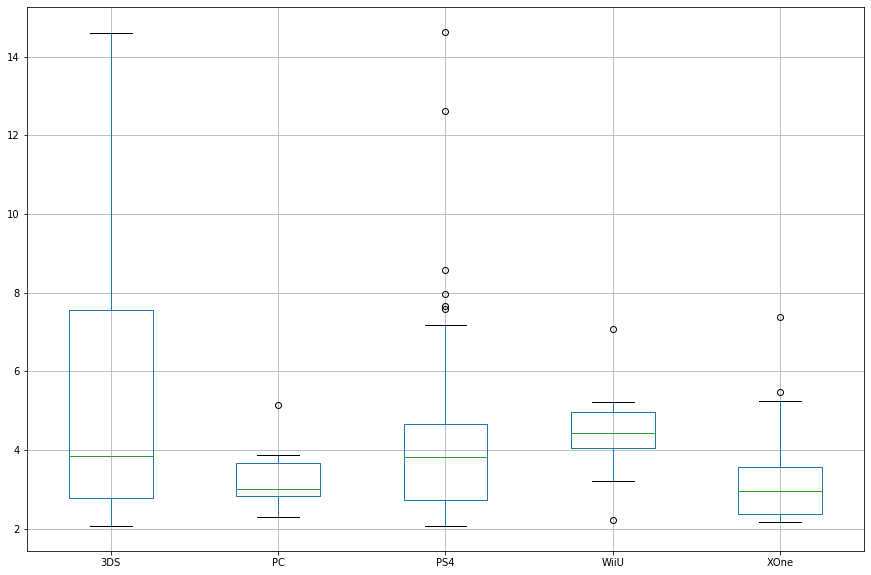

In [27]:
graf.query('sales_amount > 2.02').pivot_table(index = 'name', columns = 'platform', values = 'sales_amount', 
                 aggfunc = 'sum').boxplot(figsize = (15,10))
plt.show()

**На графике видно, что самые большие продажи игр на платформе 3DS. Некоторые продажи игр достигли суммы выше ~14млн.долларов США. Появились игры - лидеры на платформе PS4, но их совсем немного. Некоторые продажи достигли выше ~14млн.долларов США.**

*Сейчас посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.* 

Но прежде уберем из выборки 'sales_amount'(сумма продаж) выбросы. Чтобы получить более точный результат. Посмотрим на распределение:

In [28]:
graf['sales_amount'].describe()

count   2116.00
mean       0.46
std        1.14
min        0.01
25%        0.04
50%        0.11
75%        0.36
max       14.63
Name: sales_amount, dtype: float64

Имеем распределение с выборочным средним ~ 0.46 и оценкой стандартного отклонения ~ 1.14. Значение медианы ~ 0.11 меньше среднего. Что говорит о том, что распределение имеет положительную ассиметрию: наблюдается перекос вправо и длинный хвост очень высоких значений. В выборке имеются выбросы. Определим выброс следующим образом: вычислим межквартильный интервал(IQR = Q3 - Q1); выбросом будем считать значение, которое находится выше значения: Q3 + 1.5IQR, где Q1 - первый квартиль, Q3 - третий квартиль. Найдем значение:

In [29]:
q1 = graf['sales_amount'].quantile(.25)
q3 = graf['sales_amount'].quantile(.75)
iqr = q3 - q1
rezult = q3 + 1.5 * iqr
rezult

0.8462500000000002

Выше значения 0.85 находятся выбросы. Удалим их из выборки:

In [30]:
# Отфильтруем таблицу: оставим значения sales_amount < 0.85:
graf_result = graf.query('sales_amount < 0.85').copy()


Рассмотрим зависимость продаж от оценки пользователей и критиков для платформы PS4: построим график рассеяния и вычислим коэффициент корреляции Пирсона:

Взаимосвязь продаж от оценки критиков и пользователей


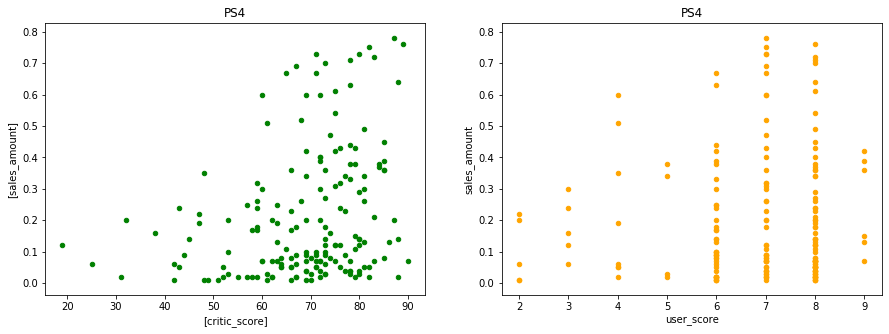

Коэффициент корреляции Пирсона PS4
              critic_score  user_score  sales_amount
critic_score          1.00        0.67          0.29
user_score            0.67        1.00          0.08
sales_amount          0.29        0.08          1.00


In [31]:
# Создадим функцию, которая будет выводить графики рассеивания по платформе и коэффициент корреляции:
def grafik_connection(data, platform):
    data = data[data['platform'] == platform].copy() # фильтрация строк по выбранной платформе
    print('Взаимосвязь продаж от оценки критиков и пользователей')  
    plt.subplots(figsize = (15,5)) # задаем размер графика
    # Рисуем графики
    data.plot(x = ['critic_score'], y = ['sales_amount'], kind = 'scatter', ax = plt.subplot(121), 
              color = 'green', title = platform) 
    data.plot(x = 'user_score', y = 'sales_amount', ax = plt.subplot(122), kind = 'scatter', 
              color = 'orange', title = platform)
    plt.show()
    # выводим на экран коэффициент Пирсона
    print('Коэффициент корреляции Пирсона', platform)
    print (data.loc[:,['critic_score', 'user_score', 'sales_amount']].corr())
    
    
# Применим функцию для платформы PS4:
grafik_connection(graf_result, 'PS4')

**Вывод:**

**Прослеживается положительная взаимосвязь продаж от оценки критиков и пользователей. Чем выше оценка - тем продажи выше. Данное предположение подтверждает полученный коэффициент корреляции Пирсона: для связи оценка критиков/ продажа ~ 0.2; оценка пользователей/ продажа ~ 0.08. Cвязь оценка критиков/ продажа сильнее. Возможно пользователи в первую очередь обращают внимание на оценку критиков.**

Посмотрим взаимосвязь для других платформ:

Взаимосвязь продаж от оценки критиков и пользователей


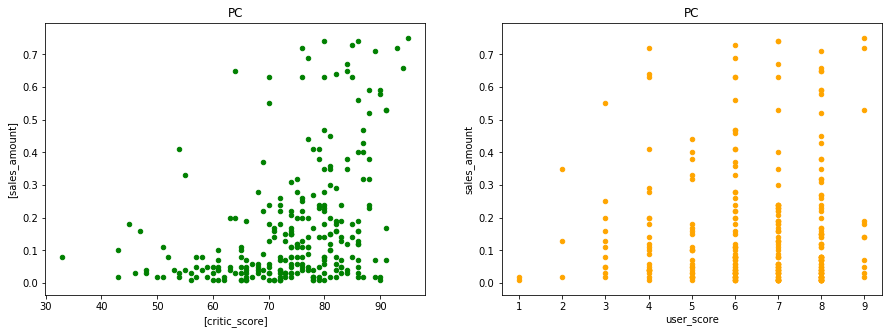

Коэффициент корреляции Пирсона PC
              critic_score  user_score  sales_amount
critic_score          1.00        0.47          0.40
user_score            0.47        1.00          0.05
sales_amount          0.40        0.05          1.00
Взаимосвязь продаж от оценки критиков и пользователей


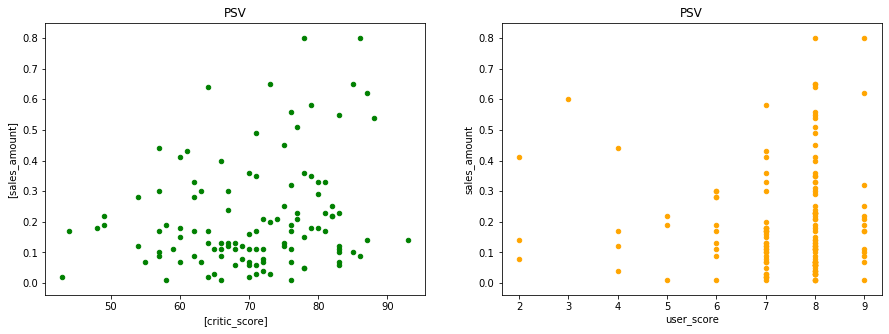

Коэффициент корреляции Пирсона PSV
              critic_score  user_score  sales_amount
critic_score          1.00        0.68          0.23
user_score            0.68        1.00          0.03
sales_amount          0.23        0.03          1.00
Взаимосвязь продаж от оценки критиков и пользователей


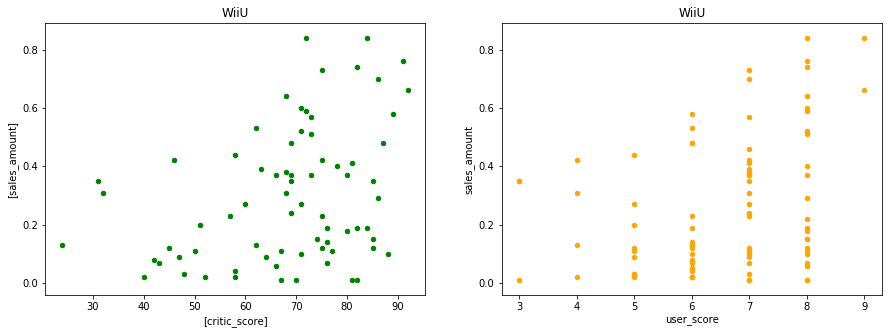

Коэффициент корреляции Пирсона WiiU
              critic_score  user_score  sales_amount
critic_score          1.00        0.71          0.35
user_score            0.71        1.00          0.31
sales_amount          0.35        0.31          1.00
Взаимосвязь продаж от оценки критиков и пользователей


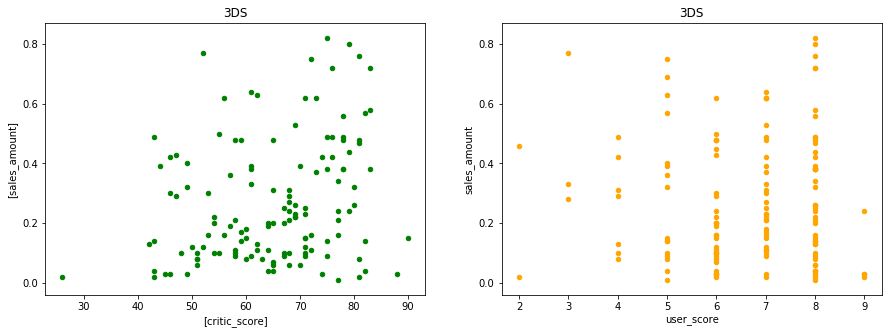

Коэффициент корреляции Пирсона 3DS
              critic_score  user_score  sales_amount
critic_score          1.00        0.70          0.26
user_score            0.70        1.00         -0.02
sales_amount          0.26       -0.02          1.00
Взаимосвязь продаж от оценки критиков и пользователей


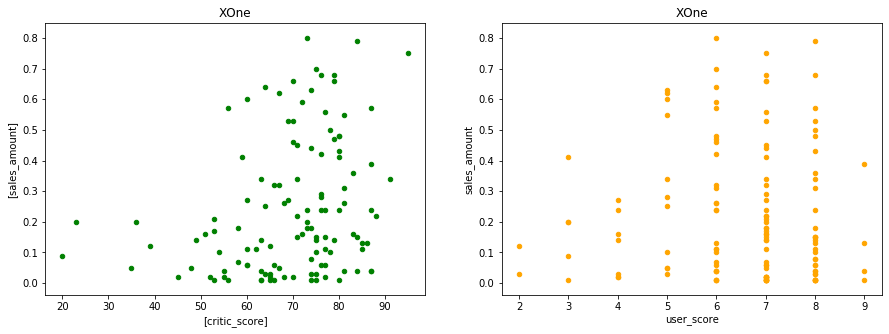

Коэффициент корреляции Пирсона XOne
              critic_score  user_score  sales_amount
critic_score          1.00        0.60          0.28
user_score            0.60        1.00          0.00
sales_amount          0.28        0.00          1.00


In [32]:
grafik_connection(graf_result, 'PC')
grafik_connection(graf_result, 'PSV')
grafik_connection(graf_result, 'WiiU')
grafik_connection(graf_result, '3DS')
grafik_connection(graf_result, 'XOne')

 

**Итак, оценка критиков и пользователей несомненно влияют на продажу игры: чем выше - тем увеличивается шанс продать игру**

*Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?*

Выведем на экран сводную таблицу, отражающую продажи по каждому жанру:

In [33]:
genre_result = graf.pivot_table(index = 'genre', values = 'sales_amount', aggfunc = ['sum', 'median', 'mean'])
genre_result.columns = ["_".join(x) for x in genre_result.columns.ravel()] # переименуем столбцы
genre_result.sort_values(by = 'sum_sales_amount', ascending = False)

,sum_sales_amount,median_sales_amount,mean_sales_amount
genre,,,
Action,246.88,0.11,0.34
Shooter,182.92,0.41,1.13
Role-Playing,161.46,0.16,0.57
Sports,101.46,0.20,0.62
Platform,65.56,0.21,0.85
Racing,49.34,0.13,0.54
Misc,44.27,0.11,0.30
Simulation,41.26,0.10,0.47
Fighting,30.67,0.12,0.49


Построим круговую диаграмму:

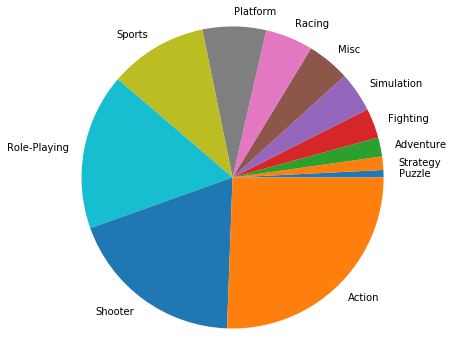

In [34]:
vals = [7.63, 13.86, 19.64, 30.67, 41.26, 44.27, 49.34, 65.56, 101.46, 161.46, 182.92, 246.88]
labels = ['Puzzle', 'Strategy', 'Adventure', 'Fighting', 'Simulation', 'Misc', 'Racing', 'Platform', 'Sports', 
          'Role-Playing',
         'Shooter', 'Action']

fig, ax = plt.subplots(figsize = (6,6))
ax.pie(vals, labels=labels)
ax.axis('equal')
plt.show()


Самые высокие продажи: 'Action', 'Shooter', 'Role-Playing'.

Самые низкие продажи: 'Strategy', 'Adventure', 'Puzzle'.

Построим диаграмму размаха:

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


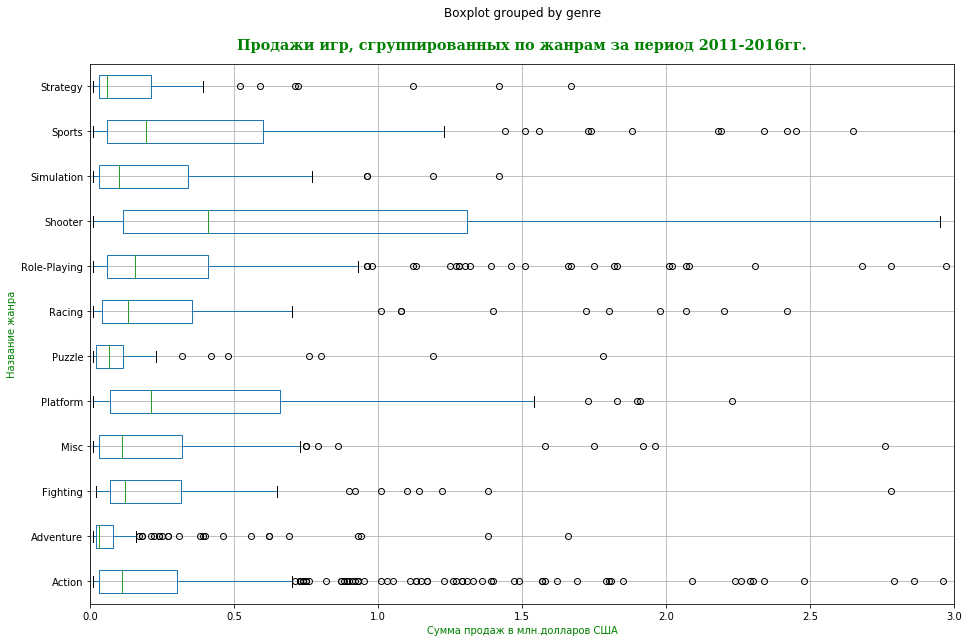

In [35]:
ss = ['Puzzle', 'Strategy', 'Adventure', 'Fighting', 'Simulation', 'Misc', 'Racing', 'Platform', 'Sports', 
      'Role-Playing','Shooter', 'Action']
graf.query('genre == @ss').boxplot('sales_amount', by = 'genre', vert = False, figsize = (15,10))
plt.title('Продажи игр, сгруппированных по жанрам за период 2011-2016гг.', family = 'serif', pad = 15, 
          color = 'green', size = 'x-large', fontweight = 'black')
plt.xlim(0, 3)
plt.xlabel('Сумма продаж в млн.долларов США', color = 'green')
plt.ylabel('Название жанра', color = 'green')
plt.show()

**Вывод:**

**Видим, что все распределения выборок, сгруппированных по жанрам, имеют положительную ассиметрию(кроме жанра Puzzle): наблюдается сильный перекос вправо и длинный хвост высоких значений.**

**Выделяются продажи игр жанра 'Shooter' ("стрелялки"). Медианные продажи ~0.41 превышают медианные продажи игр остальных жанров. Правый ус простирается до значения ~ 3.0. Т.е. 90% продаж лежат в интервале (0.01, 3.0). Продажи ~40% игр лежат в диапазоне выше 0.41 и ниже 3.0. Однозначно, данный жанр самый популярный. Продажи ощутимо выше.**

**Далее выделяются продажи игр жанра 'Platform'. Медианные продажи ~ 0,21. 90% продаж лежат в интервале (0.01, 1.5). Продажи ~40% игр лежат в диапазоне выше 0.21 и ниже 1.5млн.долларов США.**

**Далее:**

**- 'Sports'. Медианные продажи ~0.20. 90% продаж лежат в интервале(0.01, 1.2)**

**- 'Role-Playing': Медианные продажи ~0.16. 90% продаж лежат в интервале(0.01, 0.9)**

**- 'Action': медианные продажи  ~ 0.11. 90% продаж лежат в интервале(0.01, 0.7)**

**Самые низкие медианные продажи 'Adventure' ~ 0.03, 'Puzzle' ~ 0.07, 'Strategy' ~ 0.06. Но у 'Puzzle' распределение симметрично, а у остальных сильно скошено вправо. Это значит, что продажи выше у 'Strategy' и 'Adventure'.**

**Итак, самый прибыльный жанр 'Shooter'. Жанр с самыми низкими продажами - 'Puzzle'**


*Составим портрет пользователя каждого региона: Сев.Америка, Япония, Европа*



1) Выделим самые популярные платформы (топ-5). Опишем различия в долях продаж.

Выведем на экран таблицу с продажами в интересующих нас странах:

In [36]:
differences_platform = graf.groupby('platform').agg({'na_sales': ['sum'], 'eu_sales': ['sum'], 'jp_sales': ['sum']})
differences_platform.columns = ["_".join(x) for x in differences_platform.columns.ravel()] #переименование столбцов
differences_platform # Вывод на экран

,na_sales_sum,eu_sales_sum,jp_sales_sum
platform,,,
3DS,82.65,61.27,100.62
PC,29.88,56.70,0.00
PS4,108.74,141.09,15.96
PSV,12.47,13.07,21.84
WiiU,38.10,25.13,13.01
XOne,93.12,51.59,0.34


Добавим к таблице столбцы с долей продаж по каждой платформе(продажи по каждой платформе разделим на общую сумму продаж по региону): 

In [37]:
# Добавим новые столбцы к таблице:
differences_platform['share_na_sales'] = differences_platform['na_sales_sum']\
                                        / differences_platform['na_sales_sum'].sum()
differences_platform['share_eu_sales_sum'] = differences_platform['eu_sales_sum']\
                                        / differences_platform['eu_sales_sum'].sum()
differences_platform['share_jp_sales_sum'] = differences_platform['jp_sales_sum']\
                                        / differences_platform['jp_sales_sum'].sum()
pd.options.display.float_format = '{:.2f}'.format # зададим формат вывода вещественных чисел
differences_platform # Вывод таблицы на экран

,na_sales_sum,eu_sales_sum,jp_sales_sum,share_na_sales,share_eu_sales_sum,share_jp_sales_sum
platform,,,,,,
3DS,82.65,61.27,100.62,0.23,0.18,0.66
PC,29.88,56.70,0.00,0.08,0.16,0.00
PS4,108.74,141.09,15.96,0.30,0.40,0.11
PSV,12.47,13.07,21.84,0.03,0.04,0.14
WiiU,38.10,25.13,13.01,0.10,0.07,0.09
XOne,93.12,51.59,0.34,0.26,0.15,0.00


Построим графики:

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

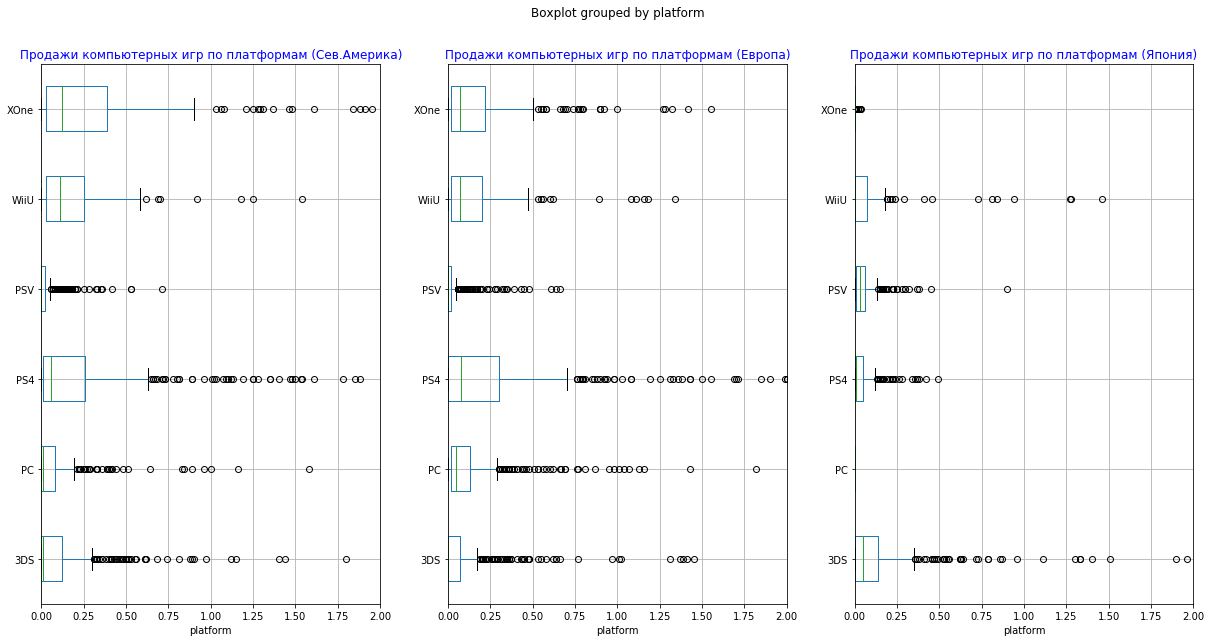

In [38]:
dannye_list = ['PS4', 'XOne', '3DS', 'WiiU', 'PSV', 'PC']
plt.subplots(figsize = (20,10))
graf.query('platform.isin(@dannye_list)').boxplot('na_sales', by = 'platform', ax = plt.subplot(1,3,1), vert = False, 
                                                 )
plt.title('Продажи компьютерных игр по платформам (Сев.Америка)', color = 'blue')
plt.xlim(0, 2)
graf.query('platform.isin(@dannye_list)').boxplot('eu_sales', by = 'platform', ax = plt.subplot(1,3,2), vert = False)
plt.title('Продажи компьютерных игр по платформам (Европа)', color = 'blue')
plt.xlim(0, 2)
graf.query('platform.isin(@dannye_list)').boxplot('jp_sales', by = 'platform', ax = plt.subplot(1,3,3), vert = False)
plt.title('Продажи компьютерных игр по платформам (Япония)', color = 'blue')
plt.xlim(0, 2)
plt.show()

**Вывод:**

**В странах Северной Америки:**

**доля продаж игр на  платформе XOne составляет ~ 26%, на PS4 ~ 30% от общей суммы. 
23 % составляют продажи игр на платформе 3DS, 10% - WiiU, 8% - доля продаж игр на PC.**

**На графике видно, что  медианные продажи игр XOne выше по сравнению с PS4. Правый ус XOne длинее, это значит что продажи выше игр на этой платформе.**

**В странах Европы:**

**доля продаж игр на платформе PS4 составляет 40%, 3DS - 18%, PC - 16%, XOne - 15%, WiiU - 7%.
На графике видно, что медианные продажи игр PS4 выше. Датасет сильно скошен вправо, правый ус длинный. Продажи выше на этой платформе.**

**В Японии доля продаж игр на платформе 3DS составляет 66% от общей суммы продаж, на платформе PSV - 14%, PS4 - 11%, WiiU - 9%. Продаж на PC и XOne нет.** 

**Стоит отметить, что в Японии укоренилась, так называемая "карманная" игровая культура. Японцы предпочитают играть на смартфонах, по дороге на работу и обратно** ['Статья "Современный взгляд на Японию"'](https://www.nippon.com/ru/in-depth/a04103/?pnum=1)





2) *Выясним в каком жанре предпочитают игры пользователи  в разных регионах*

выведем на экран таблицу с общей суммой продаж игр, сгруппированных по жанрам:

In [39]:
differences_genre = graf.groupby('genre').agg({'na_sales': ['sum'], 'eu_sales': ['sum'], 'jp_sales': ['sum']})
differences_genre.columns = ["_".join(x) for x in differences_genre.columns.ravel()] #переименование столбцов
differences_genre

,na_sales_sum,eu_sales_sum,jp_sales_sum
genre,,,
Action,93.41,90.21,36.54
Adventure,5.17,7.01,5.57
Fighting,14.05,7.87,5.67
Misc,17.18,12.70,10.70
Platform,26.97,22.30,10.71
Puzzle,2.03,3.00,2.07
Racing,17.72,22.04,4.60
Role-Playing,52.00,42.91,54.19
Shooter,81.82,72.92,4.95


Построим графики:

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

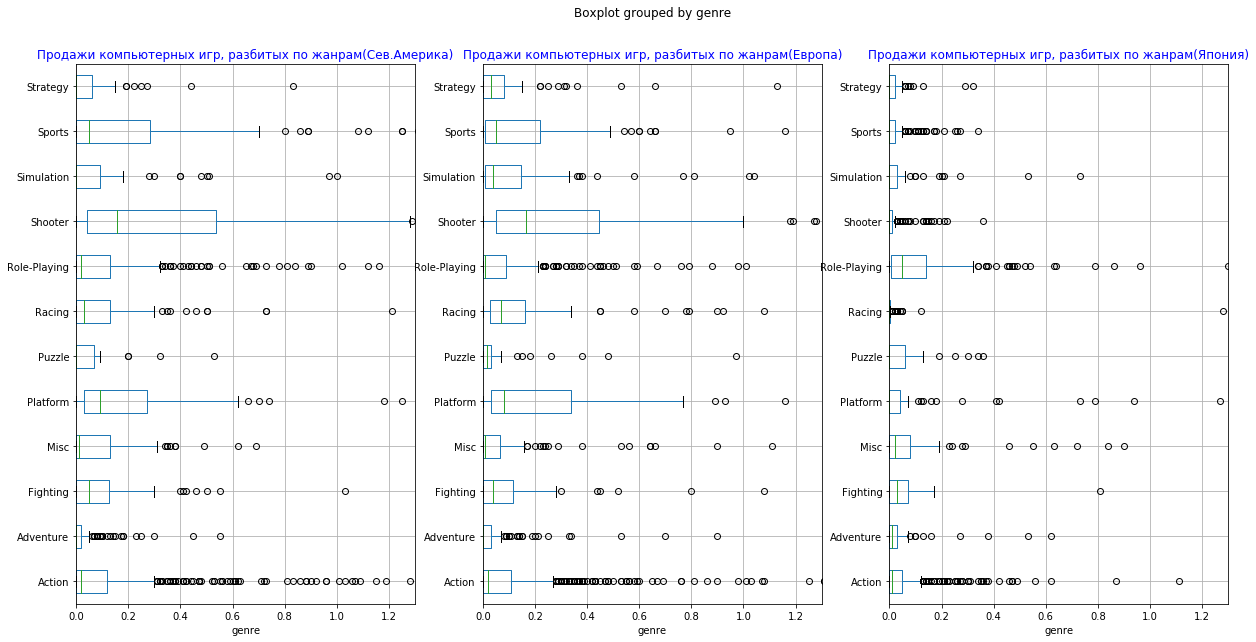

In [40]:
dannye_list = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing',
              'Shooter', 'Simulation', 'Sports', 'Strategy']
plt.subplots(figsize = (20,10))
graf.query('genre.isin(@dannye_list)').boxplot('na_sales', by = 'genre', ax = plt.subplot(1,3,1), vert = False)
plt.title('Продажи компьютерных игр, разбитых по жанрам(Сев.Америка)', color = 'blue')
plt.xlim(0, 1.3)
graf.query('genre.isin(@dannye_list)').boxplot('eu_sales', by = 'genre', ax = plt.subplot(1,3,2), vert = False)
plt.title('Продажи компьютерных игр, разбитых по жанрам(Европа)', color = 'blue')
plt.xlim(0, 1.3)
graf.query('genre.isin(@dannye_list)').boxplot('jp_sales', by = 'genre', ax = plt.subplot(1,3,3), vert = False)
plt.title('Продажи компьютерных игр, разбитых по жанрам(Япония)', color = 'blue')
plt.xlim(0, 1.3)
plt.show()

**Вывод:**

**Топ 5 жанров для стран Северной Америки и Европы: Action, Shooter, Role-Playing, Sport, Platform.**

**Топ 5 жанров для Японии: Role-Playing, Action, Platform, Misc, Simulation.**

**Пользователи стран Северной Америки и Европы предпочитают жанры  Shooter ("стрелялки") и Action(экшн), которым присуща борьба, противоборство, насилие.**

**Пользователи Японии предпочитают жанр Role-Playing - жанр игр, которые обладают развитым, насыщенным событиями и неожиданными поворотами, более или менее линейным сюжетом, «ведущим» за собой игрока. Стоит отметить что существует специальное понятие ["японская ролевая игра"](https://ru.wikipedia.org/wiki/%D0%AF%D0%BF%D0%BE%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%BE%D0%BB%D0%B5%D0%B2%D0%B0%D1%8F_%D0%B8%D0%B3%D1%80%D0%B0).**

**Японский пользователь сильно отличается от западного пользователя. В первую очередь это  связано с культурными различиями.**

[Отличия предпочтении западного пользователя от японского'](https://www.nippon.com/ru/in-depth/a04103/?pnum=2)


*Сейчас посмотрим как  рейтинг ESRB влияет на продажи в отдельном регионе. Построим диаграммы размаха:*

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

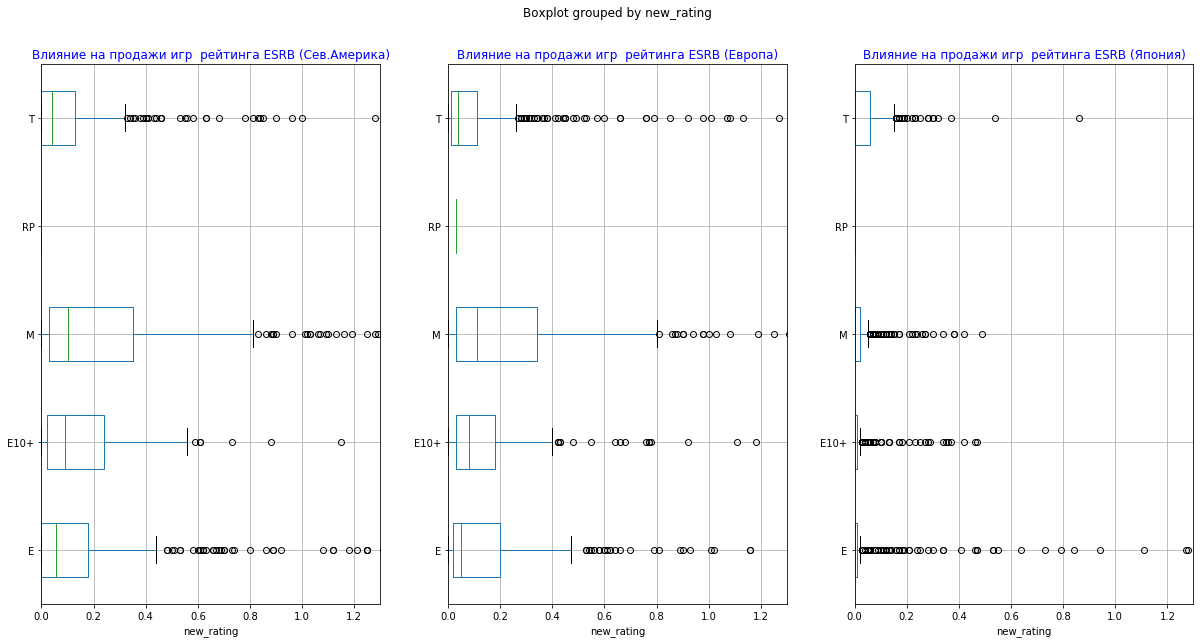

In [41]:
dannye_list = ['E', 'M', 'T', 'E10+', 'RP']
plt.subplots(figsize = (20,10))

graf.query('new_rating.isin(@dannye_list) and genre!= ""').boxplot('na_sales',
                                                                   by = 'new_rating', 
                                                                   ax = plt.subplot(1,3,1), 
                                                                   vert = False)
plt.xlim(0, 1.3)
plt.title('Влияние на продажи игр  рейтинга ESRB (Сев.Америка)', color = 'blue')
graf.query('new_rating.isin(@dannye_list) and genre!= ""').boxplot('eu_sales',
                                                                   by = 'new_rating', 
                                                                   ax = plt.subplot(1,3,2),
                                                                   vert = False)
plt.xlim(0, 1.3)
plt.title('Влияние на продажи игр  рейтинга ESRB (Европа)', color = 'blue')
graf.query('new_rating.isin(@dannye_list) and genre!= ""').boxplot('jp_sales',
                                                                   by = 'new_rating', 
                                                                   ax = plt.subplot(1,3,3), 
                                                                   vert = False)
plt.xlim(0, 1.3)
plt.title('Влияние на продажи игр  рейтинга ESRB (Япония)', color = 'blue')
plt.show()

**Вывод:**

**На графике видно, что пользователи стран Северной Америки и Европы предпочитают игры рейтинга М - для взрослых(18+). Игры с данным рейтингом могут содержать большое количество крови, сцены насилия ([Entertainment Software Rating Board](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board))** 

**Игры с рейтингом RP(рейтинг ожидается) не покупают**

**В Японии рейтинг ESRB никак не влияет на продажи**

*Сейчас выведем на экран средние пользовательские рейтинги по каждой платформе, а также значение оценки дисперсии и стандартного отклонения:*

In [42]:
total_user = graf.groupby('platform').agg({'user_score': ['mean', 'var', 'std']})
total_user.columns = ["_".join(x) for x in total_user.columns.ravel()] #переименование столбцов
# Округлим значение среднего до целого, т.к. оценка пользователей (максимум 10) проставляется целым числом
total_user['user_score_mean'] = round(total_user['user_score_mean'])
total_user

,user_score_mean,user_score_var,user_score_std
platform,,,
3DS,7.00,2.18,1.48
PC,6.00,2.71,1.65
PS4,7.00,2.21,1.48
PSV,7.00,1.89,1.38
WiiU,7.00,2.04,1.43
XOne,7.00,2.01,1.42


**Средняя оценка пользователей игр для компьютера PC 	~ 6, средняя оценка для остальных платформ ~ 7.**

Сформулируем и проверим гипотезу:

*В ходе проведенного исследования было выявлено, что выборочное среднее оценки пользователей игр для PC ~ 6, найденное значение оценки дисперсии ~ 1.65. А выборочное среднее оценки пользователей игр для платформы XOne ~ 7, найденное значение оценки дисперсии ~ 1.42. Можно ли считать полученные оценки различными? Критический уровень статистической значимости установим alpha = 0.05.  Если полученное значение будет меньше alpha, то отвергнем нулевую гипотезу, если больше - то основании отвергать нулевую гипотезу нет.*

Мы вправе выбрать другой критический уровень статистической значимости, например, alpha = 0.01. Но в этом случае возрастает вероятность отвергнуть верную нулевую гипотезу; если alpha = 0.10, то возрастает вероятность того, что мы примем неверную нулевую гипотезу и отвергнем верную альтернативную. Именно поэтому для данной задачи alpha = 0.05.

Проверим нулевую гипотезу о равенстве двух генеральных совокупностей.

Сформулируем нулевую гипотезу Н0: Средние оценки пользователей игр для PC и платформы XOne не различаются.

И альтернативную гипотезу H1: Средние оценки пользователей игр для PC и платформы XOne существенно различаются.

Решение:

In [43]:
# Для удобства расчетов данные по платформам сохраним в двух разных таблицах:
XOne_user_score = graf[graf['platform'] == 'XOne']['user_score']
pc_user_score = graf[graf['platform'] == 'PC']['user_score']
# В выборке 'user_score' есть пропущенные значения, удалим их с помощью метода dropna():
XOne_user_score.dropna(inplace = True)
pc_user_score.dropna(inplace = True)

# для проверки гипотезы применим метод st.ttest_ind():
from scipy import stats as st
alpha = .05
result = st.ttest_ind(XOne_user_score, pc_user_score)
print('p - значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4784: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


p - значение: 0.6476506899729677
Не получилось отвергнуть нулевую гипотезу


Полученное p - значение: 0.65 больше значения  alpha = .05. Это значит, что у нас нет основании, чтобы отвергнуть нулевую гипотезу. Следовательно, можем предположить, что средние пользовательские рейтинги платформ PC и XOne не различаются.

*Сейчас выведем на экран средние пользовательские рейтинги по каждому жанру, а также значение оценки дисперсии и стандартного отклонения:*

In [44]:
total_genre = graf.groupby('genre').agg({'user_score': ['mean', 'var', 'std']})
total_genre.columns = ["_".join(x) for x in total_genre.columns.ravel()] #переименование столбцов
# Округлим значение среднего до целого, т.к. оценка пользователей (максимум 10) проставляется целым числом
total_genre['user_score_mean'] = round(total_genre['user_score_mean'])
total_genre

,user_score_mean,user_score_var,user_score_std
genre,,,
Action,7.00,1.93,1.39
Adventure,8.00,1.28,1.13
Fighting,7.00,2.42,1.56
Misc,7.00,1.47,1.21
Platform,7.00,2.19,1.48
Puzzle,7.00,1.46,1.21
Racing,6.00,2.13,1.46
Role-Playing,7.00,1.47,1.21
Shooter,6.00,2.44,1.56


**Средние оценки пользователей лежат в диапазоне от 6 до 8.**

Сформулируем и проверим гипотезу:
*В ходе работы над проектом было установлено, что выборочное среднее оценок пользователей игр жанра Sports ~ 6, полученное значение оценки дисперсии ~ 2.77. А выборочное среднее оценок пользователей игр жанра Action 	~ 7, полученное значение оценки дисперсии ~ 1.93. Можем ли мы считать, полученные оценки различными?  Критический уровень статистической значимости установим alpha = 0.05. Если полученное значение будет меньше alpha, то отвергнем нулевую гипотезу, если больше - то основании отвергать нулевую гипотезу нет.*

Как и в предыдущем случае, проверим нулевую гипотезу о равенстве двух генеральных совокупностей.

Сформулируем нулевую гипотезу Н0: Средние оценки пользователей игр жанров Sports и Action не различаются.

И альтернативную гипотезу H1: Средние оценки пользователей игр жанров Sports и Action различны.

Решение:


In [45]:
# Для удобства расчетов данные по платформам сохраним в двух разных таблицах:
Sports_user_score = graf[graf['genre'] == 'Sports']['user_score']
Action_user_score = graf[graf['genre'] == 'Action']['user_score']
# В выборке 'user_score' есть пропущенные значения, удалим их с помощью метода dropna():
Sports_user_score.dropna(inplace = True)
Action_user_score.dropna(inplace = True)

# для проверки гипотезы применим метод st.ttest_ind():
from scipy import stats as st
alpha = .05
result = st.ttest_ind(Sports_user_score, Action_user_score)
print('p - значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p - значение: 8.839949034154709e-13
Отвергаем нулевую гипотезу


/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4784: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


Полученное p - значение: 8.839949034154709e-13 намного меньше значения alpha = .05. Это значит, что мы вправе отвергнуть нулевую гипотезу. Следовательно, можем предположить: средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») различны.

# ВЫВОД:

Итак, в ходе проделанной работы было установлено:

 - основными перспективными платформами по продажам на 2017г. являются, в первую очередь, PS4, XOne.
 
 - оценка критиков и пользователей положительно влияют на продажи компьютерных игр(с увеличением оценки - увеличивается количество продаж).

Также было установлено, что пользователь стран Сев.Америки и Европы значительно отличается от пользователя Японии.

Пользователи стран Запада предпочитают, в первую очередь, игры в жанре: Action, Shooter; с рейтингом ESRB: M - игры для взрослых(18+). А также игры в жанре Role-Playing, Sport, Platform.

Пользователи Японии предпочитают игры жанра Role-Playing, созданные в японском стиле. 
Стоит отметить, что рейтинг ESRB никак не влияет на продажи в Японии.

Перспективными платформами для стран Запада являются PS4, XOne. 

Для Японии уставлен следующий факт: пользователи предпочитают игры, установленные на смартфонах. Связано это, в первую очередь, с культурными особенностями. Известно, что японцы много работают, поэтому играют в основном по дороге на работу, учебу и обратно. 

Продаж игр на PC нет. Незначительны продажи на PS4, XOne. Резко падают продажи игр на платформе 3DS.

